#✌, ✊, ✋ 작살내기!
##이번 프로젝트는 ✌, ✊, ✋ 분류 모델을 만드는 것입니다.
##조금 새로운 방식으로 모델을 만들어보겠습니다.
##⭕Data Augmentation 사용 (train data 1만장으로 늘린 다음 학습)
##⭕PyTorch 사용
##이렇게 두가지 방식으로 모델을 구현해보겠습니다.
##알아볼 점
####❓과연 2가지 모델 중 어떤 모델이 가장 높은 정확도를 보여주고 있는지 과적합은 발생하지 않았는지,
####❓루브릭 평가기준 점수에 도달하였는지 확인해보겠습니다.
####❓train 데이터는 1243개로 시작하였고 test 데이터는 노드에 존재하는 300개의 데이터를 사용하였는데<br/> 파이토치에서 성능은 어느정도 일지

#⭐Data Augmentation을 사용한 ✌, ✊, ✋ 분류 모델 만들기!

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####언제나 그랬던 것처럼 구글 드라이브를 임포트 시킵니다.

##✍라이브러리 임포트

In [ ]:
import tensorflow as tf
import os
import numpy as np
import PIL
import cv2

from PIL import Image
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator

##✍train 데이터 분리

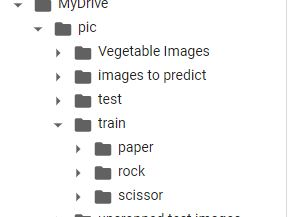

####폴더 경로를 저런식으로 설정했습니다.
####**train, test 폴더안에 paper, rock, scissor폴더**를 넣어놨습니다.
####각 폴더안에 이미지들이 있습니다.

In [ ]:
#root로 경로 지정 후 사이즈를 30, 30으로 만들어서 빈 리스트에 넣어줍니다.

root = '/content/drive/MyDrive/pic/train/'
training_images = []
training_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (30,30))
        training_images.append(img_resize)
        label = filename.split('\\')[-1]
        training_labels.append(label)
  
training_images = np.array(training_images)
training_labels = np.array(training_labels)

#라벨 인코딩을 실시하여 숫자값을 가지게 해줍니다.

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
training_labels= le.fit_transform(training_labels)
training_labels = training_labels.reshape(-1,1)

print(training_images.shape)
print(training_labels.shape)

(1243, 30, 30, 3)
(1243, 1)


####저는 **train 폴더안에 총 1243개의 데이터**를 넣었습니다.
####1243개의 데이터와 코드에서 지정한 사이즈대로 출력이 되었습니다.


```
for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (30,30))
        training_images.append(img_resize)
        label = filename.split('\\')[-1]
        training_labels.append(label)
```
####이부분 코드를 잠깐 보시면 **sorted을 써서 train안의 파일을 정렬**시켰습니다.
####(나중에 라벨 인코딩할때 0부터 들어가게 하기 위함)
####그 다음 jpg 파일을 열고 넘파이 형식으로 변환, 사이즈 지정 후 training_images 배열에 넣어줍니다.


---

##✍test 데이터 분리

In [ ]:
root = '/content/drive/MyDrive/pic/test/'
test_images = []
test_labels = []

for filename in sorted(glob(root +"*")):
    for img in glob(filename + "/*.jpg"):
        an_img = PIL.Image.open(img)
        img_array = np.array(an_img)
        img_resize = cv2.resize(img_array, (30,30))
        test_images.append(img_resize)
        label = filename.split('\\')[-1]
        test_labels.append(label)
  
test_images = np.array(test_images)
test_labels = np.array(test_labels)

from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
test_labels= le1.fit_transform(test_labels)
test_labels = test_labels.reshape(-1,1)

print(test_images.shape)
print(test_labels.shape)

(300, 30, 30, 3)
(300, 1)


####train 데이터와 같은 형식으로 루트와 변수만 바꾸어서 test 데이터를 저장시켜줍니다.

In [ ]:
print(training_images[4])
print(training_labels[4])

[[[ 96  97  99]
  [107 109 108]
  [111 112 113]
  ...
  [108 119 115]
  [107 119 117]
  [102 115 113]]

 [[117 119 120]
  [118 122 121]
  [124 128 127]
  ...
  [119 125 123]
  [108 117 116]
  [112 118 119]]

 [[121 123 122]
  [114 120 118]
  [129 135 133]
  ...
  [115 131 128]
  [112 128 125]
  [116 124 126]]

 ...

 [[ 16  18  17]
  [  2   0   1]
  [  0   0   0]
  ...
  [121 136 135]
  [120 135 134]
  [112 132 130]]

 [[ 31  33  34]
  [  9   9  11]
  [ 12  13  14]
  ...
  [118 133 131]
  [115 131 128]
  [110 128 126]]

 [[  6   6   6]
  [ 41  41  41]
  [ 60  63  64]
  ...
  [113 127 127]
  [111 127 124]
  [105 121 120]]]
[0]


####할당된 데이터를 확인해보시면 각각의 픽셀값으로 저장된걸 보실 수 있습니다.
####아마 **넘파이로 바꾸고 변수에 넣어주었기 때문**인거 같습니다.
####이미지로 출력해서 확인해보겠습니다.

---

##✍제대로 사진이 들어갔는지 확인하기

[0],[0],[0],[0],[1],[1],[1],[2],[2],[2],

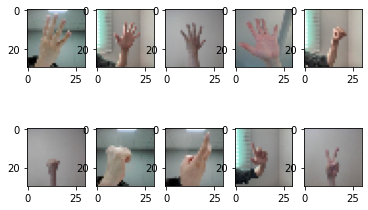

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(training_images[i*120])
    print(training_labels[i*120], end=",")
plt.show()

####이미지를 변수에 담기전에 폴더별로 sorted써서 그런지 낮은 숫자 부터 제대로 나옵니다.
####**0이 보자기, 1이 주먹, 2가 가위** 입니다.


```
    plt.imshow(training_images[i*120])
    print(training_labels[i*120], end=",")
```
####**i*120을 한것은 10번 출력을 하고 데이터가 1243개라서 10으로 나눈 값인 120을 넣었습니다**.
####가위, 바위, 보가 제대로 들어갔는지 확인하기 위해서 입니다.


[0],[0],[0],[0],[1],[1],[1],[2],[2],[2],

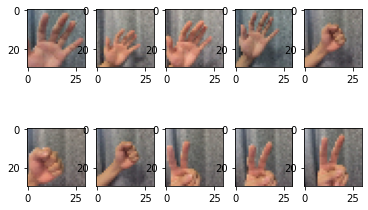

In [ ]:
import matplotlib.pyplot as plt

for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i*30])
    print(test_labels[i*30], end=",")
plt.show()



```
    plt.imshow(test_images[i*30])
    print(test_labels[i*30], end=",")
```


####test 데이터는 300장이어서 i*30을 해주었습니다.

---

##✍Data Augmentation을 통한 데이터 생성

####data augmentation은 **data set의 개수를 늘려서 overfitting을 해결하기 위해 등장한 개념**입니다.
####생성된 샘플은 가능한 진짜에 가까워야 하기 때문에 data의 특성에 
####따라서 augmentation을 조절해주어 모델이 잘 학습할 수 있도록 해야합니다.
####keras에서 제공하는 ImageDataGenerator 함수를 사용하여 데이터를 생성해 보겠습니다.

In [ ]:
tf.random.set_seed(42)

image_generator = ImageDataGenerator(
    rotation_range=45,
    brightness_range = [0.7, 1.0],
    zoom_range=0.4,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip = True,
    vertical_flip = False
)

####각각의 변수들은 다음과 같은 의미를 가집니다.

####rotation_range : 이미지를 랜덤한 각도로 돌리는 정도
####brightness_range : 이미지의 밝기를 랜덤하게 다르게 주는 정도
####zoom_range : 사진을 확대하는 정도
####width_shift_range : 사진을 왼쪽 오른쪽으로 움직이는 정도
####height_shift_range : 사진을 위 아래로 움직이는 정도
####horizontal_flip : y축을 기준으로 반전 (오른쪽 왼쪽 뒤집기)
####vertical_flip : x축을 기준으로 반전 (위 아래 뒤집기)

자세한 설명 링크 : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=isu112600&logNo=221582003889

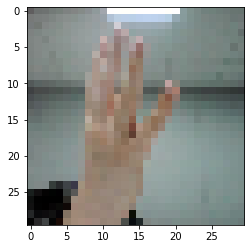

In [ ]:
sample_image = training_images[1]
plt.imshow(sample_image.astype('uint8'))
sample_image = np.expand_dims(sample_image, 0)

####처음 이미지 입니다.
####**ImageDataGenerator 적용**을 시켜보겠습니다.

In [ ]:
sample_image_it = image_generator.flow(sample_image, batch_size=1, seed = 42)

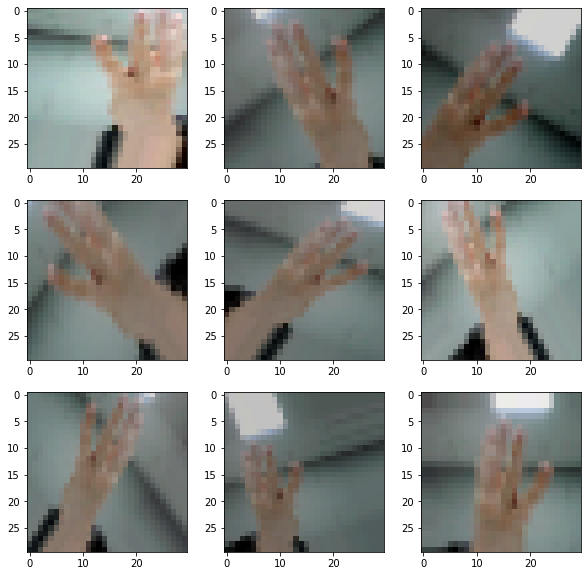

In [ ]:
fig = plt.figure(figsize = (10,10))
for i in range(9):
    plt.subplot(3, 3, 1+i)
    batch = sample_image_it.next()
    image = batch[0].astype('uint8')
    plt.imshow(image)
plt.show()

####9개 정도 뽑아서 확인을 해보았습니다.
####잘 작동하는 것을 확인하였고 이제 저희 데이터에 적용시키겠습니다.

In [ ]:
augment_size = 12000

np.random.seed(42)

mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image2 = training_images[mask].copy()
training_labels2 = training_labels[mask].copy()

####12000개의 데이터를 추가로 생성하겠습니다.


```
mask = np.random.randint(training_images.shape[0], size=augment_size)
training_image2 = training_images[mask].copy()
training_labels2 = training_labels[mask].copy()
```
####12000개의 데이터를 random.randint를 사용하여 추가로 생성해줍니다.


In [ ]:
training_image2 = image_generator.flow(training_image2, np.zeros(augment_size), batch_size=augment_size, shuffle=False, seed = 42).next()[0]

training_images = np.concatenate((training_images, training_image2))
training_labels = np.concatenate((training_labels, training_labels2))

In [ ]:
print(training_images.shape)
print(training_labels.shape)

(13243, 30, 30, 3)
(13243, 1)


####기존에 있던 데이터에 합산시키고 출력해서 shape을 확인해보았습니다.
####10000 + 1243 = 13243이 나온걸 확인하실 수 있습니다.

---

##✍데이터 분리와 정규화

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(training_images, training_labels, test_size=0.2, stratify = training_labels, random_state=42)

####train_test_split을 사용하여 8:2비율로 데이터를 나눠줍니다.
####**stratify 메소드도 정의하여 라벨값이 적절히 나눠지도록 해줍니다**.

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_valid.shape)
print(y_valid.shape)

(10594, 30, 30, 3)
(10594, 1)
(2649, 30, 30, 3)
(2649, 1)


####적절히 나누어진게 확인되었습니다.

In [ ]:
X_train = X_train / 255.0
X_valid = X_valid / 255.0
test_images = test_images / 255.0

####그 다음으로는 **255.0로 나누어 0과 1사이의 값을 가지도록 정규화** 해줍니다.
####**정규화를 해주는 이유는 값이 너무 커지게된다면 오차함수가 최저점에 수렴하는데 오랜 시간이 걸리게 됩니다**.
####따라서 0과 1사이로 **정규화를 시켜준다면 오차함수의 수렴이 빠르게 이루어지고 안정적**이게 됩니다.

---

##✍모델 설계 및 결과 출력

In [ ]:
model1 = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(30, 30, 3)),
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.BatchNormalization(axis=-1),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(rate=0.5),
    
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        448       
                                                                 
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        4640      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 13, 13, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 128)         7

####summary로 설계된 모델을 확인해보았습니다.
####**Non-trainable params: 1,344** 이라는 것이 보이네요
####훈련 불가능한 매개 변수라고 하네요
####정확한 의미는 못찾았습니다. 불안하지만 실행해보겠습니다.

In [ ]:
#모델 컴파일
model1.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
#모델 학습
model1 = model1.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
332/332 - 5s - loss: 1.1615 - accuracy: 0.5501 - val_loss: 1.1344 - val_accuracy: 0.3749 - 5s/epoch - 15ms/step
Epoch 2/20
332/332 - 2s - loss: 0.7178 - accuracy: 0.7015 - val_loss: 0.8689 - val_accuracy: 0.6123 - 2s/epoch - 5ms/step
Epoch 3/20
332/332 - 2s - loss: 0.4390 - accuracy: 0.8240 - val_loss: 0.7661 - val_accuracy: 0.6852 - 2s/epoch - 5ms/step
Epoch 4/20
332/332 - 2s - loss: 0.3068 - accuracy: 0.8812 - val_loss: 0.5978 - val_accuracy: 0.7686 - 2s/epoch - 5ms/step
Epoch 5/20
332/332 - 2s - loss: 0.2289 - accuracy: 0.9145 - val_loss: 0.5117 - val_accuracy: 0.8003 - 2s/epoch - 5ms/step
Epoch 6/20
332/332 - 2s - loss: 0.1819 - accuracy: 0.9311 - val_loss: 0.4333 - val_accuracy: 0.8316 - 2s/epoch - 5ms/step
Epoch 7/20
332/332 - 2s - loss: 0.1541 - accuracy: 0.9420 - val_loss: 0.4692 - val_accuracy: 0.8343 - 2s/epoch - 5ms/step
Epoch 8/20
332/332 - 2s - loss: 0.1399 - accuracy: 0.9472 - val_loss: 1.2081 - val_accuracy: 0.6606 - 2s/epoch - 5ms/step
Epoch 9/20
332/332 - 2s

####학습률과 오차율이 급변하는걸 보실 수 있습니다.
####값만 보더라도 **오버피팅과 제대로 학습되지 않은것** 처럼 보이지만 시각화를 시켜 확실하게 보겠습니다.

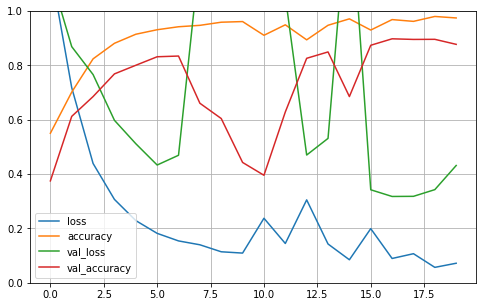

In [ ]:
import pandas as pd

pd.DataFrame(model1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

####네..첫번쨰 모델은 그냥 망했군요...
####레이어 갯수와 값들을 조정해서 한번 더 만들어보겠습니다.

---

##✍모델 재설계 및 결과 출력

In [ ]:
model = tf.keras.models.Sequential([    
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(30, 30, 3)),  
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),   
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), activation='relu'),  
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),    
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 28, 28, 32)        896       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 2, 2, 128)       

####이번에 정의한 모델은 Non-trainable params가 0으로 나오네요
####뭔가 느낌이 좋습니다.
####모델을 컴파일하고 학습시켜보겠습니다.

In [ ]:
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
hit = model.fit(X_train, y_train, validation_data = (X_valid, y_valid), epochs = 20, batch_size = 32, verbose = 2)

Epoch 1/20
332/332 - 2s - loss: 0.9786 - accuracy: 0.4919 - val_loss: 0.9408 - val_accuracy: 0.5474 - 2s/epoch - 5ms/step
Epoch 2/20
332/332 - 1s - loss: 0.7123 - accuracy: 0.6822 - val_loss: 0.6098 - val_accuracy: 0.7361 - 1s/epoch - 4ms/step
Epoch 3/20
332/332 - 1s - loss: 0.5254 - accuracy: 0.7842 - val_loss: 0.6699 - val_accuracy: 0.7293 - 1s/epoch - 3ms/step
Epoch 4/20
332/332 - 1s - loss: 0.4083 - accuracy: 0.8376 - val_loss: 0.4239 - val_accuracy: 0.8324 - 1s/epoch - 4ms/step
Epoch 5/20
332/332 - 1s - loss: 0.3204 - accuracy: 0.8743 - val_loss: 0.4011 - val_accuracy: 0.8445 - 1s/epoch - 3ms/step
Epoch 6/20
332/332 - 1s - loss: 0.2547 - accuracy: 0.9023 - val_loss: 0.3306 - val_accuracy: 0.8811 - 1s/epoch - 4ms/step
Epoch 7/20
332/332 - 1s - loss: 0.1972 - accuracy: 0.9302 - val_loss: 0.4737 - val_accuracy: 0.8324 - 1s/epoch - 4ms/step
Epoch 8/20
332/332 - 1s - loss: 0.1654 - accuracy: 0.9407 - val_loss: 0.2850 - val_accuracy: 0.9064 - 1s/epoch - 3ms/step
Epoch 9/20
332/332 - 1s 

####이번 모델은 loss값은 계속해서 줄어들고 accuracy는 꾸준히 상승하는걸 보실 수 있습니다.
####시각화를 한번 해보겠습니다.

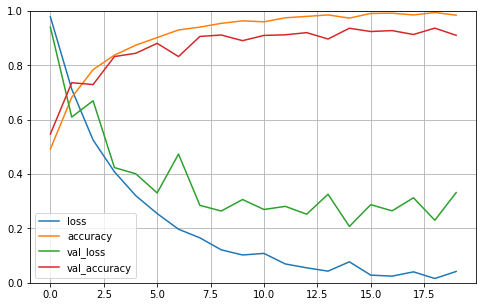

In [ ]:
import pandas as pd

pd.DataFrame(hit.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

####오! 확실히 저번모델 보다는 성능이 훨씬 좋아진거 같습니다.
####이제 결과를 확인해볼까요?

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 1.4065 - accuracy: 0.7033 - 95ms/epoch - 10ms/step
test_loss: 1.4065321683883667 
test_accuracy: 0.70333331823349


####70이 나왔습니다.
####루브릭 평가 기준인 60보다 높게 나왔네요

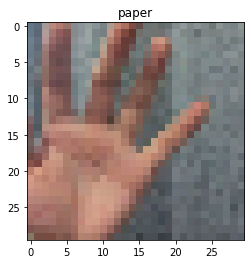

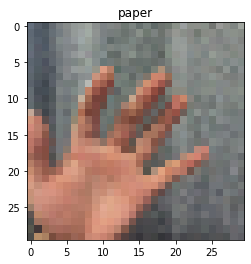

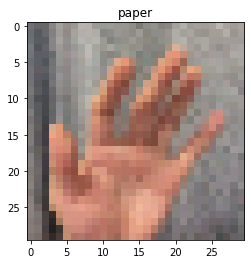

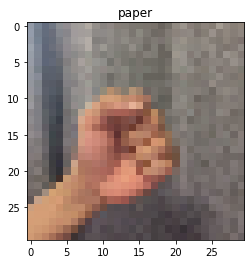

In [ ]:
import random

for i in range(4) :
    #1 ~ 300개의 이미지중 랜덤으로 4개 출력
    img = test_images[random.randint(1, 300)]
    origin_img = img
    #결과 이미지를 넣어줄 별도의 공간 생성
    image = img[tf.newaxis, ...]
    pred = model.predict(image)

    plt.imshow(origin_img)
    if np.argmax(pred[0]) == 0:
      predict1 = 'paper'
    elif np.argmax(pred[0]) == 1:
      predict1 = 'rock'
    elif np.argmax(pred[0]) == 2:
      predict1 = 'scissor'
    plt.title(predict1)
    plt.show()

####마지막으로 테스트 데이터를 모델에 집어넣어 가위, 바위, 보를 어떻게 인식하는지 이미지로 출력해보았습니다.
####정확도가 70퍼란 그런지 주먹을 보자기로 인식하네요.......

---

#⭐PyTorch를 사용한 ✌, ✊, ✋ 분류 모델 만들기!

####이번에는 파이토치로 분류모델을 만들어보겠습니다.
####데이터 전처리부터 바로 시작하겠습니다.

##✍train1과 val폴더를 생성하기

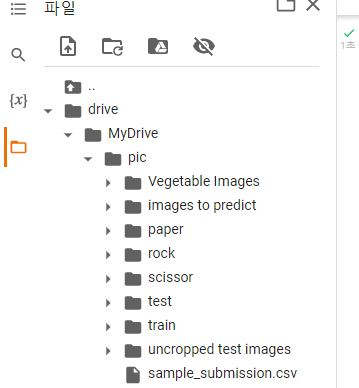

####기존에 폴더입니다.
####이제 저 상태에서 **splitted란 폴더를 만들고 그 안에 train1, val라는 폴더를 만들겠습니다**.
####이렇게 만든 데이터는 파이토치에서 사용할 데이터 입니다.

In [ ]:
#파일, 폴더를 복사하는 라이브러리인 shutil 임포트
import shutil

#train 데이터 안의 폴더인 paper, rock, scissor폴더 이름을 복사후 classes_list 변수에 저장
original_dataset_dir = '/content/drive/MyDrive/pic/train'
classes_list = os.listdir(original_dataset_dir)

#splitted 폴더 생성
base_dir = '/content/drive/MyDrive/pic/splitted'
os.mkdir(base_dir)

#splitted 폴더안에 train1, val 폴더를 생성
train_dir = os.path.join(base_dir, 'train1')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'val')
os.mkdir(validation_dir)

#train1, val 폴더안에 claeese_list담겨있던 paper, rock, scissor이름으로 폴더생성
for clss in classes_list:
  os.mkdir(os.path.join(train_dir, clss))
  os.mkdir(os.path.join(validation_dir, clss))

print('splitted 폴더 안에 train1, val 폴더 생성 완료')

splitted 폴더 안에 train1, val 폴더 생성 완료


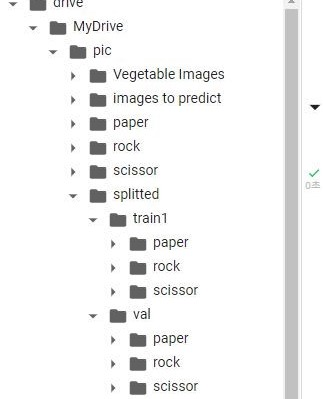

####그러면 사진과 같이 폴더들이 생성되게 됩니다.
####하지만 아직 사진 데이터를 넣어주지 않았습니다.
####이제 사진 데이터를 넣어보겠습니다.

---

##✍train1과 val폴더안에 사진 데이터 넣기

In [ ]:
import math

#for문을 통해 모든 클래스(폴더)에 대한 작업반복
for clss in classes_list:
  path = os.path.join(original_dataset_dir, clss)
#path위치에 존재하는 모든 이미지 파일 목록저장
  fnames = os.listdir(path)

#전체 데이터중 8대2 비율로 train과 val에 적용한다.
  train_size = math.floor(len(fnames) * 0.8)
  validation_size = math.floor(len(fnames) * 0.2)

#전체 데이터중 train_size 즉 전체데이터중 80퍼를 할당시킨다
  train_fnames = fnames[:train_size]
  print('train size(',clss,'): ', len(train_fnames))
  for fname in train_fnames:
    #원본파일 경로지정
    src = os.path.join(path, fname)
    #복사한 후 저장할 파일 경로 지정
    dst = os.path.join(os.path.join(train_dir, clss), fname)
    shutil.copyfile(src, dst)

  validation_fnames = fnames[train_size:(validation_size + train_size)]
  print('validation size(',clss,'): ', len(validation_fnames))
  for fname in validation_fnames:
    src = os.path.join(path, fname)
    dst = os.path.join(os.path.join(validation_dir, clss), fname)
    shutil.copyfile(src, dst)

train size( scissor ):  332
validation size( scissor ):  83
train size( paper ):  330
validation size( paper ):  82
train size( rock ):  332
validation size( rock ):  83


####코드를 실행시키면 **1243개의 데이터중 scissor에 해당하는 332가 paper에 해당하는 330,**
####**rock에 해당하는 332가 train으로 나머지는 validation으로 들어갑니다**.

In [ ]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

#데이터를 텐서형태와 64 * 64 크기로 불러옵니다.
transform_base = transforms.Compose([transforms.Resize((64, 64)),
                                      transforms.ToTensor()])

#ImageFolder를 사용하여 해당경로에서 scissor, paper, rock 폴더에 데이터를 가져온다.
train_dataset = ImageFolder(root = '/content/drive/MyDrive/pic/splitted/train1',
                            transform = transform_base)
val_dataset = ImageFolder(root = '/content/drive/MyDrive/pic/splitted/val',
                          transform = transform_base)

from torch.utils.data import DataLoader

#가져온 데이터를 배치형태로 분리하고 학습이 잘되도록 섞어줍니다.
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = 32, shuffle = True,
                                           num_workers = 2)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size = 32, shuffle = True,
                                           num_workers = 2)

print("실행 완료")

실행 완료


In [ ]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda' if USE_CUDA else 'cpu')
print('셋팅 완료')

셋팅 완료


####위에 코드는 현재 환경에서 GPU를 쓸 수 있는지 없는지를 정하고
####그에 맞는 DEVICE를 설정해주는 코드입니다.
####코랩이 GPU를 지원하더라도 우선 써놓는게 중요합니다.

---

##✍모델 함수

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

#nn.Module 클래스를 상속하여 사용합니다.
class Net(nn.Module):

#__init__함수에서는 모델에서 사용할 모든 layer를 정의합니다.
  def __init__(self):

    super(Net, self).__init__()

#nn.Module에 있는 메서드를 상속받아 사용합니다.
    self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
    self.pool = nn.MaxPool2d(2, 2)
    self.conv2 = nn.Conv2d(32, 32, 3, padding = 1)
    self.conv3 = nn.Conv2d(32, 32, 3, padding = 1)

#flatten이후에 사용될 Fully connected Layer입니다.
#뒤에 값(아웃풋)이 다음 레이어 앞에 값(인풋)으로 들어갑니다.
    self.fc1 = nn.Linear(2048, 100)
    self.fc2 = nn.Linear(100, 50)
    self.fc3 = nn.Linear(50, 3)

#클래스 내부의 forward함수는 모델이 학습 데이터를 입력받아 Forward Propagation을 실행시켜 output을 계산합니다.
  def forward(self, x):
    #데이터의 배치사이즈를 batch라는 변수에 넣어줍니다.
    batch = x.shape[0]
    x = self.conv1(x)
    x = F.relu(x)
    x = self.pool(x)

    x = self.conv2(x)
    x = F.relu(x)
    x = self.pool(x)

    x = self.conv3(x)
    x = F.relu(x)
    x = self.pool(x)
    #1차원으로 늘려줍니다
    x = x.view(batch, -1)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    x = F.relu(x)
    x = self.fc3(x)

    return F.log_softmax(x, dim = 1)

#정의한 모델을 현재 사용중인 장비에 할당합니다.
model_base = Net().to(DEVICE)
optimizer = optim.Adam(model_base.parameters(), lr = 0.001)



```
self.conv1 = nn.Conv2d(3, 32, 3, padding = 1)
```
####각 옵션은 **Conv2d(in_channels, out_channels, kernel_size)**입니다.
####그리고 **다음레이어에서는 전 레이어의 out_channels값이 in_channels에 들어가게 됩니다**.
####kernel_size는 rgb값이라 생각하면 편합니다.
####파이토치 사용법이 텐서플로우보다 까다로운거 같습니다.
####잘 설명된 블로그 링크를 남기겠습니다.
####링크 : https://wikidocs.net/60036

---

##✍모델 학습 함수

In [ ]:
def train(model, train_loader, optimizer):
  model.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    data, target = data.to(DEVICE), target.to(DEVICE)
    optimizer.zero_grad()
    output = model(data)
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
print('함수 완료')

함수 완료


####모델을 학습시키는 함수를 정의했습니다.
####**train_loader에는 데이터랑 타겟이 미니 배치형태로 묶여있어 저렇게 빼줍니다**.
####그 다음 가중치를 초기화 시켜주고 데이터를 모델에 넣어 output값을 계산합니다.


```
    loss = F.cross_entropy(output, target)
    loss.backward()
    optimizer.step()
```
####output과 target값으로 loss를 계산합니다.
####계산된 loss값으로 back propagation을 통해 계산한 gradient값을 각 파라미터에 할당시키고
####각 파라미터에 할당된 gradient 값을 이용해 모델의 파라미터를 업데이트합니다.


---

##✍모델 평가를 위한 함수

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for data, target in test_loader:
      data, target = data.to(DEVICE), target.to(DEVICE)
      output = model(data)

      test_loss += F.cross_entropy(output, target, reduction = 'sum').item()

      pred = output.max(1, keepdim = True)[1]
      correct += pred.eq(target.view_as(pred)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy
print('함수 완료')

함수 완료


####모델 평가를 위한 함수도 정의해줍니다.

---

##✍모델 학습 및 결과 출력

In [ ]:
import time
import copy

def train_baseline(model, train_loader, val_loader, optimizer, epochs = 20):
  #모델 정확도를 0으로 초기화
  best_acc = 0.0
  #정확도가 가장 높은 모델을 저장할 변수 선언
  best_model_wts = copy.deepcopy(model.state_dict())

#앞서 정의한 함수들로 학습, 평가 수행
  for epoch in range(1, epochs + 1):
    since = time.time()
    train(model, train_loader, optimizer)
    train_loss, train_acc = evaluate(model, train_loader)
    val_loss, val_acc = evaluate(model, val_loader)

#현재 검증 정확도가 최고 정확도보다 높다면 정확도를 업데이트하고 해당 epoch모델을 best_model_wts에 저장
    if val_acc > best_acc:
      best_acc = val_acc
      best_model_wts = copy.deepcopy(model.state_dict())

    time_elapsed = time.time() - since
    print(epoch)
    print('train loss: {:.4f}, accuracy: {:.2f}%'.format(train_loss, train_acc))
    print('val loss: {:.4f}, accuracy: {:.2f}%'.format(val_loss, val_acc))
    print('completed in {:.0f}m {:.0f}s'.format(time_elapsed // 60, time_elapsed % 60))
  model.load_state_dict(best_model_wts)
  return model

base = train_baseline(model_base, train_loader, val_loader, optimizer, 20)

1
train loss: 1.0966, accuracy: 33.40%
val loss: 1.0987, accuracy: 33.47%
completed in 0m 5s
2
train loss: 1.0732, accuracy: 50.10%
val loss: 1.0992, accuracy: 31.85%
completed in 0m 5s
3
train loss: 0.7625, accuracy: 65.59%
val loss: 1.1073, accuracy: 42.74%
completed in 0m 5s
4
train loss: 0.4739, accuracy: 81.59%
val loss: 1.1716, accuracy: 43.95%
completed in 0m 5s
5
train loss: 0.3135, accuracy: 89.44%
val loss: 1.0896, accuracy: 48.79%
completed in 0m 5s
6
train loss: 0.2659, accuracy: 90.54%
val loss: 1.1811, accuracy: 40.73%
completed in 0m 5s
7
train loss: 0.1333, accuracy: 96.58%
val loss: 1.0682, accuracy: 57.26%
completed in 0m 5s
8
train loss: 0.1052, accuracy: 97.28%
val loss: 1.0976, accuracy: 60.89%
completed in 0m 5s
9
train loss: 0.1400, accuracy: 94.97%
val loss: 1.0736, accuracy: 55.65%
completed in 0m 5s
10
train loss: 0.0657, accuracy: 98.39%
val loss: 0.8072, accuracy: 72.58%
completed in 0m 5s
11
train loss: 0.0726, accuracy: 97.99%
val loss: 0.7173, accuracy: 7

####1243개의 데이터를 쓴거 치고는 나쁘지 않게 나온거 같습니다.
####과연 진짜 나쁘지 않은지 test 데이터로 확인해봅시다.

In [ ]:
test_dataset = ImageFolder(root = '/content/drive/MyDrive/pic/test',
                          transform = transform_base)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = 32, shuffle = True,
                                           num_workers = 2)

####아까 위에서는 train과 validation만 불러왔었습니다.
####이번에는 test데이터를 확인할 것이므로 test 데이터도 같은 형식으로 가지고 옵니다.

In [ ]:
base.eval()
test_loss, test_accuracy = evaluate(base, test_loader)

In [ ]:
print(test_accuracy)

41.0


####그리고 학습을 시켰습니다.
####41퍼가 나오네요....
####방법을 더 연구해야겠습니다.

---

#⭐마무리

####이번 프로젝트는 딥러닝을 처음 접하는 사람이 어려워 할만한 프로젝트인거 같았습니다.
####무엇보다 데이터를 모으는게 상당히 힘들었습니다.
####그래서 **Data Augmentation이라는 데이터 증가 기법을 사용**하였습니다.
####적은 데이터로도 모델만 적용하면 될수있지 않을까?라고 생각하실 수 있습니다.
####**5000개 8000개면 모르겠습니다만, 1243개로는 성능이 그리 좋지 않았습니다**.
####다양한 데이터를 사용하는게 올바른 방법이기도 하지만 파일이름 중복제거 코랩에 업로드 시간도 오래걸려서
####Data Augmentation을 선택하게 되었습니다.
####맨 처음 **오버피팅된 모델은 출력전 dense에서 값을 512로 지정해서 오류가 난거 같습니다**.
####왜냐면 **dense 레이어의 수는 뉴런의 숫자를 의미하고 값이 많으면 많을수록 구조가 복잡해진다고 알고 있습니다**.
####**3개를 분리하는 모델에서 512로 지정하여 충분히 오버피팅**이 생길수있다고 생각했습니다.
####두번째는 **파이토치를 사용한 분류 모델을 만들었습니다**.
####처음으로 노드를 진행하면서 무수한 오류들과 포기하고 싶다는 마음이 들었습니다.
####가장 어려웠던것이 클래스 형식의 모델 구현방식, fc레이어에 계산된 값을 넣어주어야함
####그리고 **텐서플로우랑 다른 데이터 로드 방식**이었습니다.
####**구현 방법은 무궁무진하지만 제가 구현했던 방법은 텐서플로우에서는 접하지 못한 방법이어서 더 어려움이 있었습니다**.
####비록 결과는 좋지 못하였지만 **새로운 프레임워크를 사용하여 모델을 오류 없이 만들었다는 점에 의미**를 두고 싶습니다.
####놓친 점과 부족한 점이 있어 결과가 좋지 못했겠지만, 이번 기회를 발판삼아 파이토치를 좀더 공부하여 다양한 방식으로 
####모델을 구현하고 정확도도 높이고 싶습니다.


---

참고 서적 : 한 줄씩 따라 해보는 파이토치 딥러닝 프로젝트 모음집

참고 자료 : https://github.com/LeeHoWon98/tensorflow---image_load-before-